#  Tensorflow Tutorial



##### Machine Learing  Process
![image](https://www.capgemini.com/sites/default/files/en/2016/05/machinelearning_v2.png)

#####  Data?

![image](http://en.proft.me/media/science/ml_types2.png)

#### Feature Engineering？
![image](https://image.slidesharecdn.com/davidepsteinfeatureengineering-150603202058-lva1-app6891/95/feature-engineering-4-638.jpg?cb=1433362940)

##### Model?
![image](https://atonwp.files.wordpress.com/2015/12/machine_learning_alogrithms.png)

##### Tensorflow example
http://playground.tensorflow.org/

##### What is Tensorflow?
![image](https://image.slidesharecdn.com/tensorflowoverview-151116093832-lva1-app6892/95/tensor-flow-overview-2-638.jpg?cb=1447666738)

![image](https://image.slidesharecdn.com/tensorflow-tutorial-170208055732/95/tensorflow-tutorial-4-638.jpg?cb=1486541178)


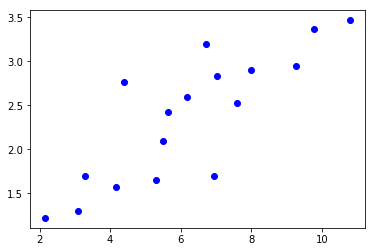

Epoch: 0050 cost= 0.080925621 W= 0.284858 b= 0.547775
Epoch: 0100 cost= 0.080468521 W= 0.282761 b= 0.562864
Epoch: 0150 cost= 0.080064371 W= 0.280788 b= 0.577056
Epoch: 0200 cost= 0.079707012 W= 0.278933 b= 0.590403
Epoch: 0250 cost= 0.079391018 W= 0.277187 b= 0.602958
Epoch: 0300 cost= 0.079111680 W= 0.275546 b= 0.614766
Epoch: 0350 cost= 0.078864753 W= 0.274003 b= 0.625868
Epoch: 0400 cost= 0.078646466 W= 0.272551 b= 0.636311
Epoch: 0450 cost= 0.078453474 W= 0.271186 b= 0.646132
Epoch: 0500 cost= 0.078282841 W= 0.269902 b= 0.655371
Epoch: 0550 cost= 0.078132033 W= 0.268694 b= 0.66406
Epoch: 0600 cost= 0.077998720 W= 0.267558 b= 0.672232
Epoch: 0650 cost= 0.077880889 W= 0.26649 b= 0.679918
Epoch: 0700 cost= 0.077776752 W= 0.265485 b= 0.687147
Epoch: 0750 cost= 0.077684730 W= 0.26454 b= 0.693946
Epoch: 0800 cost= 0.077603385 W= 0.263651 b= 0.700341
Epoch: 0850 cost= 0.077531524 W= 0.262815 b= 0.706355
Epoch: 0900 cost= 0.077467985 W= 0.262028 b= 0.712012
Epoch: 0950 cost= 0.077411890 W

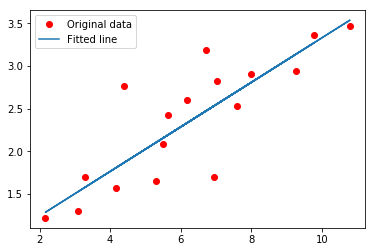

Testing... (Mean square loss Comparison)
Testing cost= 0.0773427
Absolute mean square loss difference: 1.96546e-05


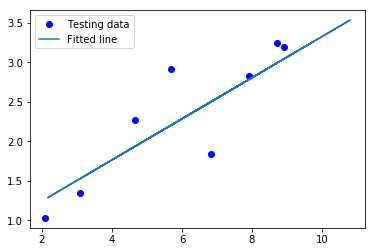

In [1]:
'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.plot(train_X, train_Y, 'bo', label='Testing data')
plt.show()

n_samples = train_X.shape[0]


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

###### Artificial Neural Network, ANN

在機器學習和認知科學領域，人工神經網路（英文：artificial neural network，縮寫ANN），簡稱神經網路（英文：neural network，縮寫NN）或類神經網路，是一種模仿生物神經網路(動物的中樞神經系統，特別是大腦)的結構和功能的數學模型或計算模型，用於對函式進行估計或近似。

![image](https://i2.wp.com/python3.codes/wp-content/uploads/2017/01/XIHOY.jpg?fit=640%2C417)
![image](https://i.stack.imgur.com/OGTyV.png)


In [3]:
##fully connected layers
'''
A Multilayer Perceptron implementation example using TensorFlow library.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 180.230793563
Epoch: 0002 cost= 42.593656274
Epoch: 0003 cost= 27.065074730
Epoch: 0004 cost= 18.848120942
Epoch: 0005 cost= 13.624018143
Epoch: 0006 cost= 10.077290699
Epoch: 0007 cost= 7.789367132
Epoch: 0008 cost= 5.818972938
Epoch: 0009 cost= 4.356562457
Epoch: 0010 cost= 3.407608950
Epoch: 0011 cost= 2.601131162
Epoch: 0012 cost= 1.884061551
Epoch: 0013 cost= 1.533756616
Epoch: 0014 cost= 1.224345047
Epoch: 0015 cost= 0.954296439
Optimization Finished!
Accuracy: 0.9459
